# 131  Final Project
## Dataset:  Crypto Currency from Kaggle
### By Carolanne Link and Vileena Koneru

#### Import the CSV 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from datetime import datetime
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
cc = pd.read_csv('~/Documents/UCLA/Academics/2018 Spring/Stats 131/crypto-markets.csv', 
                   parse_dates=['date'], index_col='date',date_parser=dateparse)

#### View Head

In [2]:
print(cc.head())

               slug symbol     name  ranknow    open    high     low   close  \
date                                                                           
2013-04-28  bitcoin    BTC  Bitcoin        1  135.30  135.98  132.10  134.21   
2013-04-29  bitcoin    BTC  Bitcoin        1  134.44  147.49  134.00  144.54   
2013-04-30  bitcoin    BTC  Bitcoin        1  144.00  146.93  134.05  139.00   
2013-05-01  bitcoin    BTC  Bitcoin        1  139.00  139.89  107.72  116.99   
2013-05-02  bitcoin    BTC  Bitcoin        1  116.38  125.60   92.28  105.21   

            volume        market  close_ratio  spread  
date                                                   
2013-04-28     0.0  1.500520e+09       0.5438    3.88  
2013-04-29     0.0  1.491160e+09       0.7813   13.49  
2013-04-30     0.0  1.597780e+09       0.3843   12.88  
2013-05-01     0.0  1.542820e+09       0.2882   32.17  
2013-05-02     0.0  1.292190e+09       0.3881   33.32  


## Context and Description of the Data

#### Background information on the subject and field of study

This dataset came from Kaggle.  The user that it belongs to is listed as Jesse Vent or "jvent".  In the About Me section of his profile it says "Senior data analyst and machine learning enthusiast, working on large scale public service ICT projects".  It also says he's from Adelaide, Australia and that his preferred languages are R "and a little python".

I don't know much about crypto-currency and therefore I was intrigued to explore the dataset.  Therefore, I did some background research.  

For starters, cryptocurrencies in Merriam-Webster Dictionary is defined as  "any form of currency that only exists digitally, that usually has no central issuing or regulating authority but instead uses a decentralized system to record transactions and manage the issuance of new units, and that relies on cryptography to preven counterfeiting and fradulent transactions".  Merriam-Webster also provides an example, "Virtual currency bitcoin hit the mainstream in 2014. Bitcoin ATMs started springing up all over the world … , allowing people to exchange cash for the cryptocurrency, a secure digital payment outside of conventional financial institutions. —Brenda Poppy"

Wikipedia describes it as "digita asset designed to work as a medium of exchange that uses strong cryptography to secure financial transactions, control the creation of additional units, and verify the transfer of assets".

These definitions are quite close and from what I understand its a digital currency that is massively unregulated.  Bitcoin, which was first released as open-source software in 2009, is the most well-known.  Wikipedia says since then over 4,000 alterative coins have been created.

Ultimately, I'm very curious to explore this dataset and learn more about how the cryptocurrency market works and what trends are present.

Cryptocurrency is enabled by the use of Blockchain, a decentralized record of transactions. A transaction is complete when it is permanently and unalterably added to the blockchain. Of the various types of cryptocurrency, Bitcoin is the most popular coin. Cryptocurrency is exciting to many because a decentralized system would obviate the need for a central clearing authority, such as a bank. Suggested applications of this technology are in voting electronically, keeping medical patients' information secure, managing fractional ownership of automobiles, financial services and more. 

However, cryptocurrency is a highly volatile form of currency with many financial experts claiming that it has no intrinsic value and is unsuitable for investments, citing that it is merely a speculative market. The Bitcoin crash of December 17, 2017 followed speculation that it would reach 142,000 USD - when it in fact fell steadily and reached 6500 USD this year. It is for this reason and the potential that people see in bitcoin that it is useful to predict where bitcoin will go in terms of future value. Speculative market or not, being able to predict the price of cryptocurrenncy is of advantage. 

Aside from the name and slug of the coin, this dataset is comprised of mostly numeric variables with the exception being the date. We can attempt predictions of the future value as well as observe past trends.



### Information about Data Collection

##### Who Collected the Data

The Kaggle user who posted and manages the data gives credit to the website CoinMarketCap for providing the data.

#### When the data was collected

The data has no clear collection date.  From the context, the collection seems to be ongoing and Jesse manages it periodically for this dataset.

However, Jesse updates the versions regularly and the first version **(Version 1)** was uploaded 10 month ago.  

**Version 2** was uploaded 9 months ago with the note "Historical cryptocurrency market data and token prices for all tokens:  486006 rows of data, 1104 different crypto currencies, and Refreshed data to include 54 new coins up until: 10 September 2017".

**Version 3** was uploaded 9 months ago with the note "Updated data up until 19th September 2017".

**Version 4** was uploaded 8 months ago with the note "Cryptocurrency data includes up to 30/09/2017".

**Version 5** was uploaded 8 months ago with the note "Fixed symbols/name and no longer rounding fields to 5 decimals".

**Version 6** was uploaded 7 months ago with the note "Updates to handle names better and include current rank".

**Version 7** was uploaded 6 months ago with the note "Huge overhaul of formatting and conversions".

**Version 8** was uploaded 5 months ago with the note "Fixed duplicates, new variables, refreshed data".

**Version 9** was uploaded 5 months ago with the note "Updated Data as of 11/01/2017".

**Version 10** was uploaded 4 months ago with the note "Refreshed as of 28 Jan".

**Version 11** was uploaded 4 months ago with the note "updated data".

**Version 12** was uploaded 4 months ago with the note "Updated data as of 22 Feb 2018".

**Version 13** was uploaded 2 months ago with the note "Data current as of 27/03/2018".

**Version 14** was uploaded 18 days ago with the note "latest update 21 May".

**Version 15** was uploaded 18 days ago with the note "Data refreshed".

**Version 16** was uploaded 18 days ago with the note "Data refresh 080618".

Upon looking at the date column, we see that the data was collected in real-time from April 2013 to June 2018.



#### How the data was collected

It is not clearly stated how the data was collected.  Neither Jesse Vent or the MarketCoinCap website specifies collection methods.  From the context and the notes it is clear that MarketCoinCap is a daily updated source of the cryptocurrency statistics.  From the context of the variables, we know that data is taken every day at both opening and closing of the market.  Over the course of each day the high and low are also recorded.  This means that there is constant monitoring and data collection of the values throughout the day.  They are probably published at the close of each day recapping the day's changes.  Jesse Vent scrapes this data on what seems to be a pretty regular basis to keep this dataset up-to-date and properly organized.

#### Any implications this may have on analysis

Since this is real data coming from real cryptocurrency market values, the data is very applicable to everyday life.  For those who invest in this, the trends of this data could be a very important part of their decisions and investment choices.

## Exploratory Analysis of the Data

Let's look at the info for the whole dataset.

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785024 entries, 2013-04-28 to 2018-05-24
Data columns (total 12 columns):
slug           785024 non-null object
symbol         785024 non-null object
name           785024 non-null object
ranknow        785024 non-null int64
open           785024 non-null float64
high           785024 non-null float64
low            785024 non-null float64
close          785024 non-null float64
volume         785024 non-null float64
market         785024 non-null float64
close_ratio    785024 non-null float64
spread         785024 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 77.9+ MB


Let's first explore each variable and its distribution.
How many unique cryptocurrencies are featured here? It claims "all" are featured.

In [4]:
cc['name'].describe()

count       785024
unique        1643
top       HempCoin
freq          2221
Name: name, dtype: object

There are 1643 unique names of currencies with the most frequently represented currency being HempCoin.

In [5]:
print(cc['slug'].describe())
print(cc['symbol'].describe())

count       785024
unique        1644
top       litecoin
freq          1866
Name: slug, dtype: object
count     785024
unique      1605
top          NET
freq        1955
Name: symbol, dtype: object


An article from the New York Times explains, "The term slug derives from the days of hot-metal printing, when printers set type by hand in a small form called a stick. Later huge Linotype machines turned molten lead into casts of letters, lines, sentences and paragraphs. A line of lead in both eras was known as a slug." In news articles, they became an abbreviation for topics.  They could be acronyms or just abbreviated words.  The NY Times gave a few examples, BRIT for Britain and SCOTUS for Supreme Court of the United States.

In this case, a slug is the short name for a cryptocurrency, there are 1644 slugs for 1643 different coins (name), which means that there is 1 more slug than there are names. The most frequently featured slug is bitcoin. 

In [6]:
print(cc['name'].describe())

count       785024
unique        1643
top       HempCoin
freq          2221
Name: name, dtype: object


There are 1605 different symbols, which means that some symbols are used for multiple slugs and names.  The top most frequented symbol is NET.

Next, we'll convert the date column to a datetime object and look at the date column.

In [7]:
cc.index

DatetimeIndex(['2013-04-28', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05',
               '2013-05-06', '2013-05-07',
               ...
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-19', '2018-05-20', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24'],
              dtype='datetime64[ns]', name='date', length=785024, freq=None)

The date column ranges from April 28, 2013 to June 6, 2018. The top most frequent date is May 24, 2018.

Let's explore the datetime object more thoroughly later on.

Next,we look at the ranknow column.

In [8]:
rank = cc.groupby(['ranknow', 'slug'])['market'].mean()
rank

ranknow  slug               
1        bitcoin                3.078214e+10
2        ethereum               1.892582e+10
3        ripple                 5.168853e+09
4        bitcoin-cash           1.845137e+10
5        eos                    4.189334e+09
6        litecoin               1.429485e+09
7        stellar                9.100688e+08
8        cardano                7.105550e+09
9        iota                   4.006688e+09
10       tron                   2.587292e+09
11       neo                    1.951882e+09
12       monero                 7.244444e+08
13       dash                   8.933909e+08
14       tether                 3.723972e+08
15       nem                    1.167381e+09
16       vechain                1.146229e+09
17       binance-coin           7.443559e+08
18       ethereum-classic       1.176534e+09
19       ontology               5.543627e+08
20       qtum                   1.320165e+09
21       omisego                1.143071e+09
22       bytecoin-bcn     

From looking at the MarketCoinCap website,we see that the currencies are ranked based upon "Market Cap" value.
According to Investopedia, "market cap" or Market Capitalization is the total dollar market value of a company's outstanding shares...it is calculated by multiplying a company's shares outstanding by the current market price of one share.  The investment community uses this figure to determine a company's size, as opposed to using sales or total asset figures.  Using market capitalization to show the size of a company is important because company size is a basic determinant of various characteristics in which investors are interested, including risk."  It also provides the example calculation of a company with 20 million shares selling at 100 dollars a share would have a market cap of 2 billion dollars.  
Therefore, it comes as no surprise that bitcoin is ranked \#1, it is the most popular crypto-currency.  

In [9]:
print(cc['ranknow'].describe())

count    785024.000000
mean        842.650876
std         452.624872
min           1.000000
25%         472.000000
50%         910.000000
75%        1185.000000
max        1645.000000
Name: ranknow, dtype: float64


The ranknow column has a minimum of 1 and a maximum of 1645.  

In [10]:
print(cc['open'].describe())
print(cc['spread'].describe())

count    7.850240e+05
mean     3.550859e+02
std      1.403939e+04
min      2.500000e-09
25%      1.117000e-03
50%      1.723150e-02
75%      2.159187e-01
max      2.298390e+06
Name: open, dtype: float64
count    7.850240e+05
mean     1.252368e+02
std      7.379191e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e-02
max      1.770563e+06
Name: spread, dtype: float64


From the summary we see opening prices are highly skewed to the right.  Open prices are the opening value of each coin at the beginning of the market's day.  The maximum is 2298390 and the minimum is close to 0 (2.5x10^-9) , with a mean of 355.0859 and a huge standard deviation of 14039.39. The 50% quantile is at 0.01723150.

The spread, according to Investopedia is "the difference between the bid and the ask price of a security or asset.  It can also refer to an options position established by purchasing one option and selling another option of the same class but of a different series."  Jesse Vent defines this column as "Spread is the $USD difference between the high and low values for the day".  For our data, the spread is also highly skewed to the right. The minimum is 0 and the maximum is 1770563, with a mean of 125.2368 and a standard deviation of 7379.191.  The 50% quantile is 0.

To get a better idea of the distribution, we took the log.

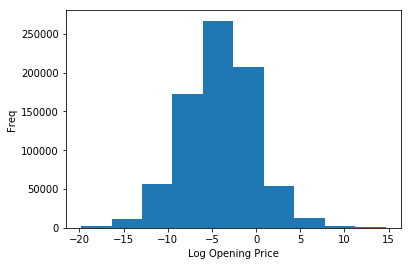

In [139]:
cc['logopen'] = np.log(cc['open'])
plt.hist(cc['logopen'])
plt.xlabel("Log Opening Price")
plt.ylabel("Freq")
plt.show()

Plotting a histogram of the log-transformed values created a plot that 
resembles a normal distribution.

We created a log transformed plot for the spread as well.

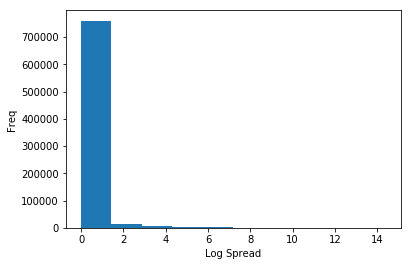

In [138]:
cc['logspread'] = np.log1p(cc['spread'])
plt.hist(cc['logspread'])
plt.xlabel("Log Spread")
plt.ylabel("Freq")
plt.show()

Adding 1 to the 0 values, log-transformed spread is still highly skewed.

Next, we look at the summary statistics for the high value.  This is the highest value that crypto-currency attains durring the market day.  We're starting to expect all the values to be skewed to the right.

In [70]:
cc.high.describe()

count    7.850240e+05
mean     4.233219e+02
std      1.733459e+04
min      3.200000e-09
25%      1.305000e-03
50%      1.980350e-02
75%      2.424478e-01
max      2.926100e+06
Name: high, dtype: float64

The high values are skewed to the right, as expected.  The minimum is close to 0 at (3.2x10^-9) and a maximum of 2926100, with a mean of 423.3219 and a standard deviation of 17334.59.  The 50% quantile is 0.01980350.  We took the log transformation to plot a histogram of the high values.

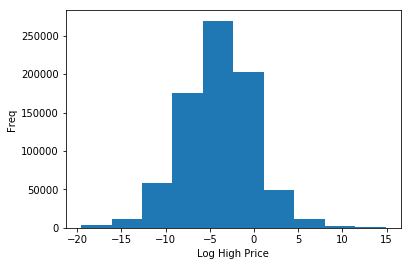

In [137]:
cc['loghigh']=np.log(cc['high'])
plt.hist(cc['loghigh'])
plt.ylabel("Freq")
plt.xlabel("Log High Price")
plt.show()

These results look the same as those for the opening values, the log transformation allows for normal behavior.

Next, we look at the low values.  As the name would imply, this is the lowest value that the crypto-currency attains during the market day.

In [72]:
cc.low.describe()

count    7.850240e+05
mean     2.980848e+02
std      1.157055e+04
min      9.200000e-14
25%      9.630000e-04
50%      1.511100e-02
75%      1.915900e-01
max      2.030590e+06
Name: low, dtype: float64

The low points span between 0 and 2030590. The mean is 298.0848 with a standard The span is hugely right skewed with 75% of the values being below 0.19159.



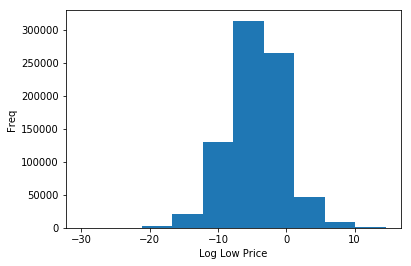

In [136]:
cc['loglow'] = np.log(cc['low'])
plt.hist(cc['loglow'])
plt.xlabel("Log Low Price")
plt.ylabel("Freq")
plt.show()

The log transform makes the data look somewhat normal, but it doesn't appear as normal as some of the other variables did under this transformation.

Next, we look at the close variable.  Again, as the name would imply, this is the value at the close of the market day.

In [74]:
cc.close.describe()

count    7.850240e+05
mean     3.536499e+02
std      1.396510e+04
min      0.000000e+00
25%      1.119000e-03
50%      1.723000e-02
75%      2.156592e-01
max      2.300740e+06
Name: close, dtype: float64

The close values are between 0 and 2399740.  The mean is 353.6499 with a standard deviation of 13965.10.  The 50% quantile is at 0.01723.

We log transform the close values.

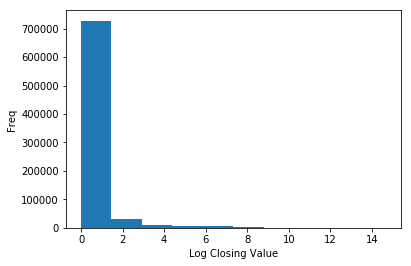

In [135]:
cc['logclose']=np.log1p(cc['close'])
plt.hist(cc['logclose'])
plt.ylabel("Freq")
plt.xlabel("Log Closing Value")
plt.show()

Closing value is similar to spread value, extremely skewed, or maybe a different transform is needed.

We then look at the Volume variable.

In [76]:
print(cc.volume.describe())

count    7.850240e+05
mean     7.459260e+06
std      1.817992e+08
min      0.000000e+00
25%      6.400000e+01
50%      1.201000e+03
75%      3.963225e+04
max      2.384090e+10
Name: volume, dtype: float64


The volume variable shows a low of 0, a high of 23840900000.  The mean is 7459260 with a standard deviaton of 181799200.  The 50% quantile is 1201.

We look further into log transforming this variable, like we did with the others.

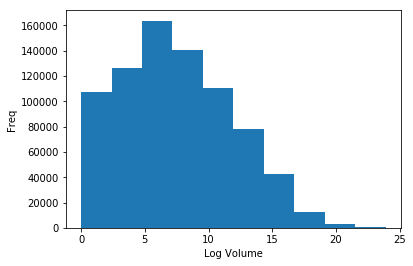

count    785024.000000
mean          7.459935
std           4.414825
min           0.000000
25%           4.174387
50%           7.091742
75%          10.587424
max          23.894668
Name: logvol, dtype: float64

In [77]:
cc['logvol']=np.log1p(cc['volume'])
plt.hist(cc['logvol'])
plt.xlabel("Log Volume")
plt.ylabel("Freq")
plt.show()
cc.logvol.describe()

Volume:
Half of all individual coins are exchanged somewhere between e^4 and e^11 times.

Next, we look into market value.  We discussed this value briefly when we looked at the rank variable.

In [78]:
cc.market.describe()

count    7.850240e+05
mean     1.563100e+08
std      3.478147e+09
min      0.000000e+00
25%      1.294600e+04
50%      1.932045e+05
75%      3.635550e+06
max      3.261410e+11
Name: market, dtype: float64

The minimum is 0 and the maximum 326141000000.  The mean is 156310000 and the standard deviation is 3478147000.  The 50% quantile is 193204.5.  We see market value is skewed to the right.

Again, we choose to try a log transformation.

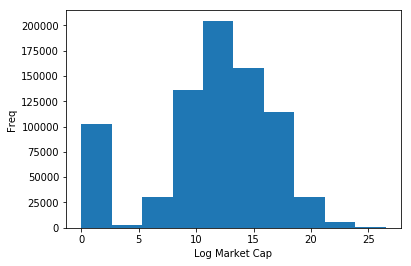

In [134]:
cc['logmarket'] = np.log1p(cc['market'])
plt.hist(cc['logmarket'])
plt.ylabel("Freq")
plt.xlabel("Log Market Cap")
plt.show()

Log transform of market gives an almost-normal distribution.

Lastly, we'll look at the closing ratio.  Close ratio is the daily close rate, min-maxed with the high and low values for the day. 
Close Ratio = (Close-Low)/(High-Low)

In [80]:
cc.close_ratio.describe()

count    7.850240e+05
mean             -inf
std               NaN
min              -inf
25%      1.552000e-01
50%      4.342000e-01
75%      7.586000e-01
max      1.000000e+00
Name: close_ratio, dtype: float64

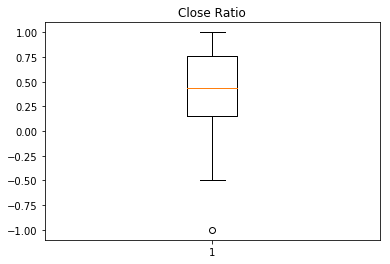

In [81]:
plt.boxplot(cc.close_ratio)
plt.title("Close Ratio")
plt.show()

We see that since this is a ratio, the minimum and mean come across as -inf, and the standard deviation is NaN.  The 25% quantile is 0.1552.  The 50% quantile is at 0.4342.  The 75% quantile is 0.7586.  The maximum is, of course, 1.  Close ratio is slightly skewed.  We can't log-transform this variable.

Let's look at our new dataset with more accommodating log-transformed variables and drop the others.


In [82]:
cc.drop(columns=['logspread','logclose'])
cc.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread,logopen,logspread,loghigh,loglow,logclose,logvol,logmarket
date,,,,,,,,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88,4.907495,1.585145,4.912508,4.883559,4.906829,0.0,21.129078
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49,4.901118,2.673459,4.993760,4.897840,4.980451,0.0,21.122820
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88,4.969813,2.630449,4.989956,4.898213,4.941642,0.0,21.191881
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17,4.934474,3.501646,4.940856,4.679535,4.770600,0.0,21.156878
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32,4.756861,3.535728,4.833102,4.524827,4.665418,0.0,20.979604


We are going to explore the relationships between some variables with plots to give us ideas of what to model.

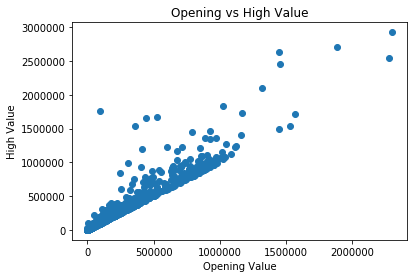

In [132]:
plt.scatter(cc['open'],cc['high'])
plt.title("Opening vs High Value") 
plt.xlabel("Opening Value")
plt.ylabel("High Value")
plt.show()

A scatterplot showing the relationship between the opening value of a coin and it's highest value.
Opening value and high are directly correlated.

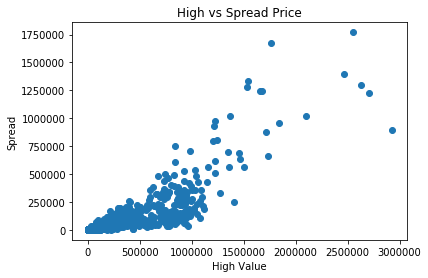

In [84]:
plt.scatter(cc['high'],cc['spread'])
plt.title("High vs Spread Price")
plt.xlabel("High Value") #Change x and y axis scale
plt.ylabel("Spread")
plt.show()

A scatterplot showing highest value and spread.  We can see a fan in the variance,  non-constant variance is obvious.

Let's look at which currencies have the highest high and close values.

In [85]:
highmeans = cc.groupby(['name'])['high'].mean()

In [86]:
highmeans.sort_values(ascending = False)

name
Bit20                 573800.507742
Project-X             291122.594070
42-coin                17652.879396
Russian Miner Coin     11995.447078
Primalbase Token        4615.546571
IDEX Membership         4304.785652
bitBTC                  3113.846189
CryptopiaFeeShares      2673.788523
Bitcoin                 1951.660102
bitGold                 1461.007459
Internet of Things      1261.868184
Bitcoin Cash            1182.859091
Mixin                    977.271409
Maker                    890.052639
WETH                     847.635417
300 Token                556.053070
Byteball Bytes           345.830228
Zcash                    264.443959
TerraNova                253.844006
SegWit2x                 215.186281
Ethereum                 205.027354
Lightning Bitcoin        197.714129
Sovereign Hero           187.035625
Veritaseum               181.205357
BT2 [CST]                171.860237
Bitcoin Gold             166.013568
Gnosis                   161.364403
Dash                   

In [87]:
closemeans = cc.groupby(['name'])['close'].mean()

In [88]:
closemeans.sort_values(ascending = False)

name
Bit20                 485437.176774
Project-X             231403.399461
42-coin                15309.871509
Russian Miner Coin     10827.388037
Primalbase Token        4239.073048
IDEX Membership         3936.608406
bitBTC                  2840.327591
CryptopiaFeeShares      2416.614765
Bitcoin                 1889.513762
bitGold                 1366.551230
Internet of Things      1134.038905
Bitcoin Cash            1104.780376
Mixin                    895.261275
Maker                    839.815556
WETH                     719.216806
300 Token                480.605222
Byteball Bytes           318.646717
Zcash                    237.645051
Ethereum                 196.889603
SegWit2x                 181.911308
Sovereign Hero           173.063406
TerraNova                170.493456
Lightning Bitcoin        165.915419
Veritaseum               155.713325
Gnosis                   151.362836
Bitcoin Gold             150.840793
BT2 [CST]                146.461706
Dash                   

In both cases of high and close, the top value is from Bit20 and the lowest is The Cypherfunks.

In [89]:
volmeans = cc.groupby(['name'])['volume'].mean()
volmeans.sort_values(ascending = False)

name
Bitcoin             1.171548e+09
Bitcoin Cash        9.292763e+08
Ethereum            7.075375e+08
EOS                 5.363772e+08
Tether              4.634491e+08
TRON                3.354088e+08
Cardano             2.162328e+08
Qtum                2.144078e+08
Ripple              1.719680e+08
Ethereum Classic    1.584033e+08
CK USD              1.388396e+08
Litecoin            1.208760e+08
Huobi Token         1.087217e+08
IOTA                9.974698e+07
Bitcoin Gold        9.727490e+07
Mithril             9.703662e+07
Ontology            9.427183e+07
NEO                 8.797341e+07
IOST                7.076920e+07
aelf                6.680524e+07
OmiseGO             6.648238e+07
True Chain          6.619169e+07
Cortex              6.610622e+07
Status              6.456758e+07
Binance Coin        6.300307e+07
Hshare              6.140922e+07
ICON                6.091282e+07
Storm               6.027209e+07
QuarkChain          5.910860e+07
VeChain             5.848345e+07
     

Bit20 has both the highest high and highest close value.  The lowest high belongs to The Cypherfunks and lowest close value belongs to X2.

In [90]:
cc.volume.describe()

count    7.850240e+05
mean     7.459260e+06
std      1.817992e+08
min      0.000000e+00
25%      6.400000e+01
50%      1.201000e+03
75%      3.963225e+04
max      2.384090e+10
Name: volume, dtype: float64

The largest volume on average is Bitcoin, which comes as no surprise since it's the most well-known of the cryptocurrencies.

Volume is the amount of that coin traded in that day in the last 24 hrs.
A demand indicator for future price of coin.
More demand, higher future price.
Mean volume is 7459260.

Next, we look at the relationship between open and close prices.

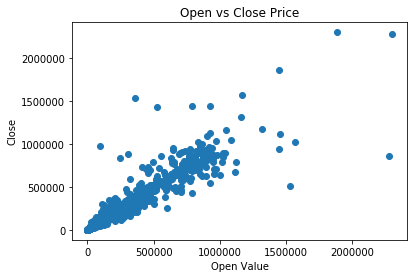

In [91]:
plt.scatter(cc['open'],cc['close'])
plt.title("Open vs Close Price")
plt.xlabel("Open Value") #Change x and y axis scale
plt.ylabel("Close")
mod_fit = sm.OLS(cc.open, cc.close).fit()
res = mod_fit.resid # residuals
plt.show()

This relationship looks like one that could very accurately be modeled by a linear model.  We will explore this below in the modeling section.

Next, we look deeper into the time series.

Text(0.5,1,'Bitcoin Opening Price from 2013 to 2018')

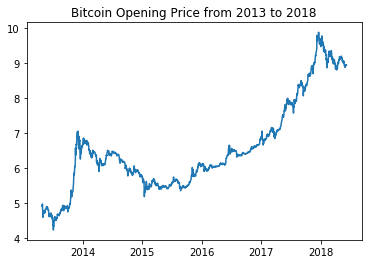

In [92]:
bit = cc['name']=="Bitcoin"
bitopen = cc.logopen[bit]
plt.plot(bitopen)
plt.title("Bitcoin Opening Price from 2013 to 2018")

The high prices reflect the same trend as the opening prices.  

Text(0,0.5,'log Volume')

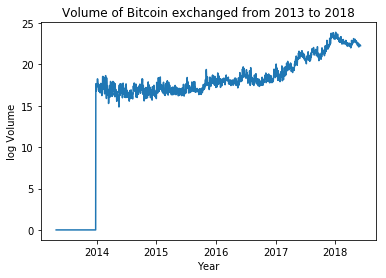

In [129]:
bitvol = cc.logvol[bit]
plt.plot(bitvol)
plt.title("Volume of Bitcoin exchanged from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("log Volume")

The volume of bitcoin traded has only increased throughout the years.

Text(0.5,1,'Bitcoin Spread over Time')

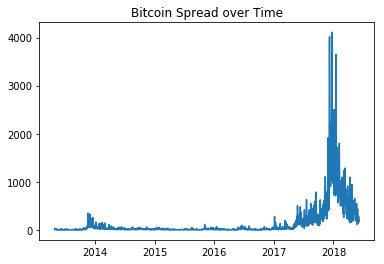

In [94]:
bitspread = cc.spread[bit]
plt.plot(bitspread)
plt.title("Bitcoin Spread over Time")

Bitcoin spread fluctuates quite a bit towards the end of 2017, which corresponds with the bitcoin crash of December 17, 2017.

## Model

### Simple Linear Model Between Open and Close

In [95]:
X = cc.open
X.shape
X = X.values.reshape([785024,1])
print(X.shape)
y= cc.close

(785024, 1)


In [96]:
regr = linear_model.LinearRegression()

In [97]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Coefficients and Intercepts

In [98]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [0.9511476]
Intercept: 
 15.910857376516503


The coefficient means that for every USD increase in opening price, the closing price's projected increase is 0.9511 USD.  The intercept, which would have no real-world meaning would be that given a 0 USD opening price, the projected close price would be 15.91 USD; which is, of course, not true.

##### R^2 Value

In [99]:
# r squared value
regr.score(X, y)  # when we fit all of the data points

0.9143320966535049

This means that this model explains 91.4% of the variation in the response variable around its mean.

##### Plot

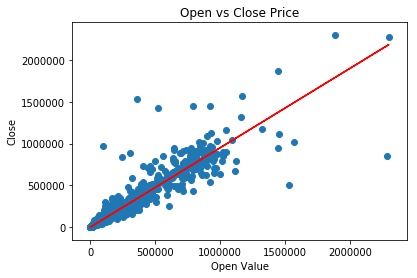

In [100]:
plt.plot(X, regr.predict(X),color='r')
plt.scatter(cc['open'],cc['close'])
plt.title("Open vs Close Price")
plt.xlabel("Open Value") #Change x and y axis scale
plt.ylabel("Close")
mod_fit = sm.OLS(cc.open, cc.close).fit()
res = mod_fit.resid # residuals
plt.show()
y_pred = regr.predict(X)

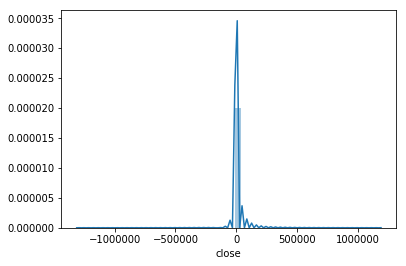

In [101]:
residuals_linear = y - y_pred
sns.distplot(residuals_linear)

The data does look normal.

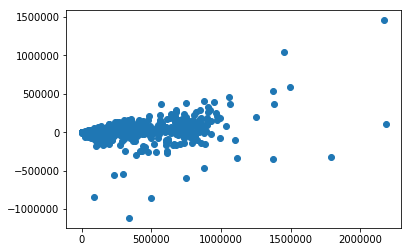

In [102]:
plt.scatter(y_pred, res)
plt.show()

There are no obvious trends in the residuals.

##### Cross-Validation

In [103]:
cv_results = cross_val_score(regr, X, y, cv = 5)  # 5 fold cross validation

print(cv_results)  # lots of variation
# an undesirable trait

[0.99152461 0.95170542 0.90813792 0.97480055 0.92823925]


The R^2 and CV values reassure us that the simple linear model is a good fit.

We will try Ridge regression to get something that hopefully performs a little bit better.

### Ridge Regression

In [104]:
ridgemodel = linear_model.Ridge(alpha =1)
fit2= ridgemodel.fit(X,y)

##### Coefficient and Intercept

In [105]:
print('Ridge Coefficient: \n', ridgemodel.coef_)
print('Ridge Intercept: \n', ridgemodel.intercept_)

Ridge Coefficient: 
 [0.9511476]
Ridge Intercept: 
 15.910857376530089


The coefficient means that for every USD increase in opening price, the closing price's projected increase is 0.9511 USD.  The intercept, which would have no real-world meaning would be that given a 0 USD opening price, the projected close price would be 15.91 USD; which is, of course, not true.

Note that since this is a ridge regression with one predictor, this answer is virtually identical to the simple linear regression.

##### Ridge Model Score

In [106]:
ridgemodel.score(X,y)

0.9143320966535049

This means that this model explains 91.4% of the variation in the response variable around its mean.

##### Cross-Validation

In [107]:
cv_results = cross_val_score(ridgemodel, X, y, cv = 5)  # 5 fold cross validation
print(cv_results)  

[0.99152461 0.95170542 0.90813792 0.97480055 0.92823925]


##### Plot

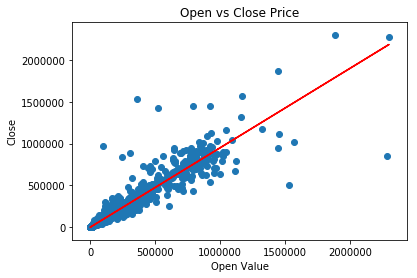

In [108]:
plt.plot(X, ridgemodel.predict(X),color='r')
plt.scatter(cc['open'],cc['close'])
plt.title("Open vs Close Price")
plt.xlabel("Open Value") #Change x and y axis scale
plt.ylabel("Close")
plt.show()
y_pred = ridgemodel.predict(X)

We use both Linaer Regression and Ridge Regression to create a moel for this data. They came out very similarly because it is a simple linear regression.  We chose not to include more predictors because our R^2 and our Ridge scores are very good, both over 91%. 

### Multiple Linear Regression

In [109]:
regr2 = linear_model.LinearRegression()
X2 = cc[['open','high','low']]

In [110]:
X2.shape
X2 = X2.values.reshape([785024,3])
print(X2.shape)

(785024, 3)


In [111]:
regr2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Coefficients and Intercepts

In [112]:
print('Coefficients: \n', regr2.coef_)
print('Intercept: \n', regr2.intercept_)

Coefficients: 
 [-0.3143337   0.51906872  0.80648243]
Intercept: 
 5.132104625772854


The first coefficient means that for every USD increase in opening price, the closing price's projected decrease is -0.314 USD. The second coefficient means that for every USD increase in high price, the closing price's projected increase is 0.519 USD.  The third coefficient means that for every USD increase in opening price, the closing price's projected decrease is 0.806 USD. The intercept, which would have no real-world meaning would be that given a 0 USD opening price, the projected close price would be 5.13 USD; which is, of course, not true.

##### R^2

In [113]:
# r squared value
regr2.score(X2, y)  # when we fit all of the data points

0.9729132582697259

##### Cross-Validation

In [114]:
cv_results = cross_val_score(regr2, X2, y, cv = 5)  # 5 fold cross validation
print(cv_results)  

[0.99878657 0.98678459 0.96595953 0.99341537 0.93848605]


The multiple linear regression, using high and low in addition to the open predictor gives a R^2 of 97.3%! This means that this model explains 97.3% of the variation in the response variable around its mean.

In [115]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

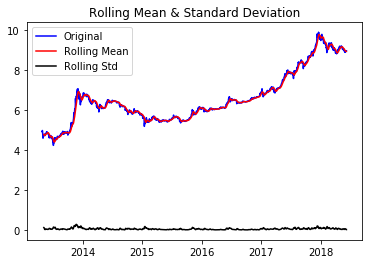

Results of Dickey-Fuller Test:
Test Statistic                   -0.604740
p-value                           0.869907
#Lags Used                       23.000000
Number of Observations Used    1842.000000
Critical Value (1%)              -3.433905
Critical Value (5%)              -2.863110
Critical Value (10%)             -2.567606
dtype: float64


In [116]:
test_stationarity(bitopen)

The Dickey-Fuller Test is a test for stationarity. Here the rolling mean and rolling standard deviation do not remain constant. We conclude that the condition of stationarity is fulfilled when the test statistic is lower than any of the critical values, but that is not the case here. We will attempt to make this series as close to stationary as is possible. 

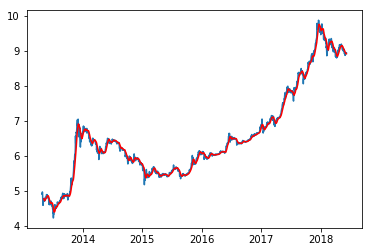

In [117]:
moving_avg = bitopen.rolling(window=12,center=False).mean()
plt.plot(bitopen)
plt.plot(moving_avg, color='red')

In [118]:
bitopen_moving_avg_diff = bitopen - moving_avg
bitopen_moving_avg_diff.head(12)

date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05         NaN
2013-05-06         NaN
2013-05-07         NaN
2013-05-08         NaN
2013-05-09   -0.049859
Name: logopen, dtype: float64

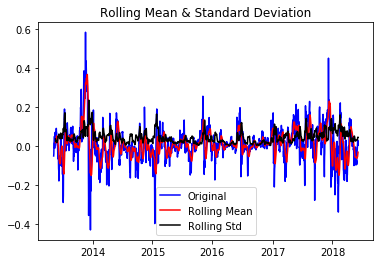

Results of Dickey-Fuller Test:
Test Statistic                -7.699141e+00
p-value                        1.353953e-11
#Lags Used                     2.200000e+01
Number of Observations Used    1.832000e+03
Critical Value (1%)           -3.433925e+00
Critical Value (5%)           -2.863119e+00
Critical Value (10%)          -2.567611e+00
dtype: float64


In [119]:
bitopen_moving_avg_diff.dropna(inplace=True)
test_stationarity(bitopen_moving_avg_diff)

After smoothing by finding the rolling mean, we achieve a test statistic lower than even the 1% the critical value. We reject the null and say with 99% confidence that this series has achieved stationarity.

Lag: 25
Coefficients: [ 0.00487413  1.00066393 -0.0176042   0.00847118  0.04104188  0.00764925
  0.01594388 -0.07263909  0.00768099  0.01815972  0.04158254  0.00287009
 -0.06100653  0.00360816  0.02463699 -0.01143482 -0.03035623  0.1061651
 -0.09937761 -0.0181902   0.09874851 -0.0910251   0.05933864 -0.08225046
  0.02346249  0.02337139]
predicted=8.924101, expected=8.910066
predicted=8.920535, expected=8.922752
predicted=8.913676, expected=8.927542
predicted=8.909012, expected=8.940117
predicted=8.909085, expected=8.951897
predicted=8.916157, expected=8.922778
predicted=8.911830, expected=8.939315
Test MSE: 0.001


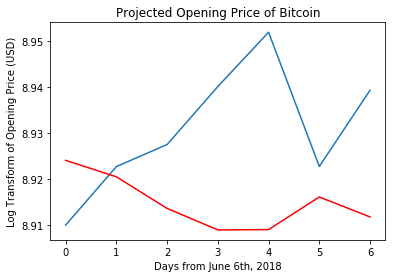

In [127]:
series = bitopen
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.xlabel("Days from June 6th, 2018")
plt.ylabel("Log Transform of Opening Price (USD)")
plt.title("Projected Opening Price of Bitcoin")
pyplot.show()

In [125]:
bitopen.tail()

date
2018-06-02    8.927542
2018-06-03    8.940117
2018-06-04    8.951897
2018-06-05    8.922778
2018-06-06    8.939315
Name: logopen, dtype: float64

The autoregression model is shown above. Blue values are expected values and red values are predicted. Autoregression is a time series model that uses observations from previous time steps in a regression model to predict the value at the next time increment. It is widely used in time series forecasts. 

The forecast for Bitcoin for the next seven days after June 6, 2018 starts at e^8.925 which is approximately 7518 dollars. This makes sense because the last value on June 6th is e^8.939, or 7555 USD.

Link to Slides:  https://docs.google.com/presentation/d/1TsbAjpUbPSwQ0hKMuLA5pqIbW5gNTyJciWVGwPcGUYc/edit?usp=sharing

Link to Video:  https://youtu.be/xs1x4R9PA_g 